In [8]:
import sys
sys.path.append('../')

from src.network import NeuralNetwork
from src.trainer import Trainer
from src.optimizers import SGD, Adam
from src.layers import Layer
from src.activations import ActivationFunction
from src.losses import LossFunction
from data.iris_loader import load_iris_data
from src.utils import plot_loss_curve


Epoch 1/1000, Train Loss: 0.3662, Val Loss: 0.3662
Epoch 2/1000, Train Loss: 0.3662, Val Loss: 0.3662
Epoch 3/1000, Train Loss: 0.3662, Val Loss: 0.3662
Epoch 4/1000, Train Loss: 0.3662, Val Loss: 0.3661
Epoch 5/1000, Train Loss: 0.3661, Val Loss: 0.3661
Epoch 6/1000, Train Loss: 0.3661, Val Loss: 0.3661
Epoch 7/1000, Train Loss: 0.3661, Val Loss: 0.3661
Epoch 8/1000, Train Loss: 0.3661, Val Loss: 0.3661
Epoch 9/1000, Train Loss: 0.3660, Val Loss: 0.3660
Epoch 10/1000, Train Loss: 0.3660, Val Loss: 0.3660
Epoch 11/1000, Train Loss: 0.3660, Val Loss: 0.3660
Epoch 12/1000, Train Loss: 0.3660, Val Loss: 0.3660
Epoch 13/1000, Train Loss: 0.3660, Val Loss: 0.3659
Epoch 14/1000, Train Loss: 0.3659, Val Loss: 0.3659
Epoch 15/1000, Train Loss: 0.3659, Val Loss: 0.3659
Epoch 16/1000, Train Loss: 0.3659, Val Loss: 0.3659
Epoch 17/1000, Train Loss: 0.3659, Val Loss: 0.3658
Epoch 18/1000, Train Loss: 0.3659, Val Loss: 0.3658
Epoch 19/1000, Train Loss: 0.3658, Val Loss: 0.3658
Epoch 20/1000, Train 

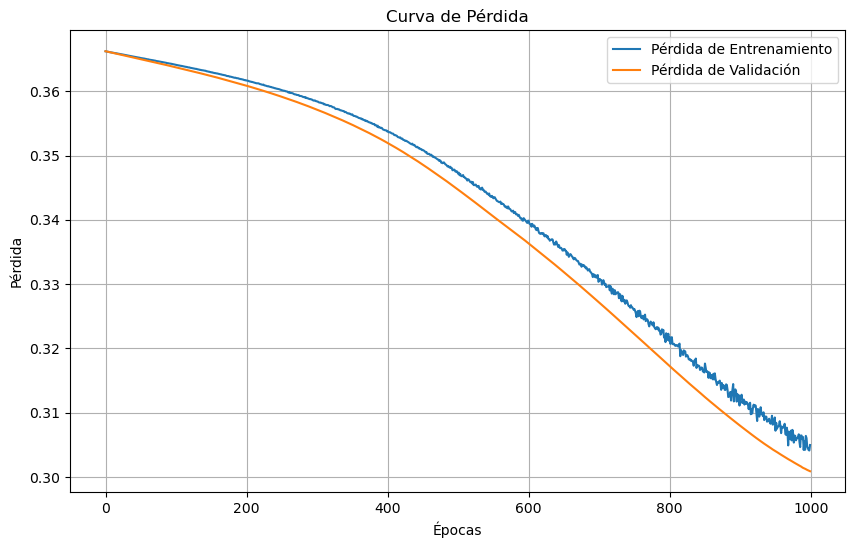

In [16]:
X_train, y_train, X_val, y_val, X_test, y_test = load_iris_data()

model = NeuralNetwork([4, 6, 3], ["relu", "softmax"])
adam = Adam(lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)
sdg = SGD(lr=0.01, momentum=0.0, weight_decay=1e-4)

trainer = Trainer(
    model, 
    sdg, 
    loss_fn= LossFunction.cross_entropy_loss,
    loss_grad= LossFunction.cross_entropy_grad)

history = trainer.train(
    X_train, y_train, 
    x_val=X_val, y_val=y_val, 
    epochs=1000, batch_size=32)